In [31]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [32]:
# Load the pickle file
with open("../data/cleaned_data.pkl", "rb") as file:
    df = pickle.load(file)

In [33]:
df.head()

,ZIBZIN,IDAvisAutorisationCheque,FlagImpaye,Montant,DateTransaction,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,...,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure
0,A013010004908126703060931,78643044,0,20.00,2017-02-01 07:32:14,1,0,0,0,551,...,37.186668,52.076034,0,1,4.000000,4.0,4.0,20.00,0.00,27134
1,A013011306908024927155000,78643045,0,20.00,2017-02-01 07:43:37,1,0,0,0,551,...,48.844716,52.076034,1,2,1.797685,4.0,4.0,28.61,8.61,27817
2,A013010002908283134592527,78643046,0,57.64,2017-02-01 07:47:38,1,0,0,0,549,...,73.118280,52.076034,0,1,4.000000,4.0,4.0,57.64,0.00,28058
3,A011010002908105209831316,78643047,0,54.29,2017-02-01 07:48:48,0,1,1,1,267,...,110.056926,53.554234,0,1,4.000000,4.0,4.0,54.29,0.00,28128
4,A013010041908000125652029,78643048,0,26.90,2017-02-01 08:13:27,1,0,0,0,549,...,45.368313,52.076034,1,1,1.997106,4.0,4.0,59.15,32.25,29607


In [34]:
df["FlagImpaye"].value_counts(normalize=True) * 100

FlagImpaye
0    99.354498
1     0.645502
Name: proportion, dtype: float64

<Axes: title={'center': 'Montant'}, xlabel='FlagImpaye'>

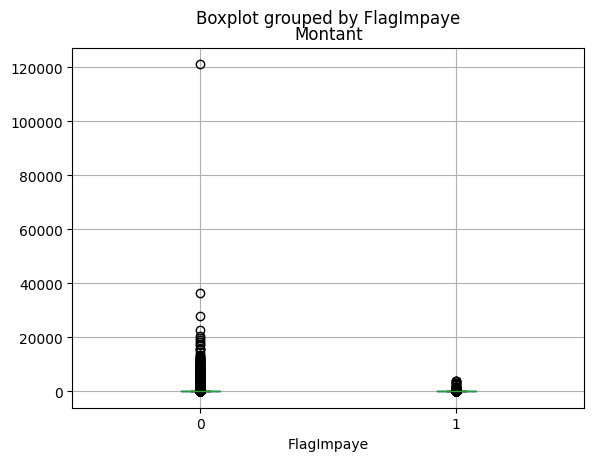

In [35]:
# Check cost distribution of fraudulent vs non-fraudulent transactions
df.boxplot(column="Montant", by="FlagImpaye")

In [36]:
# Range price of fraudulent transactions
fraudulent = df[df["FlagImpaye"] == 1]
print("Fraudulent transactions cost range:")
print("Min:", fraudulent["Montant"].min())
print("Max:", fraudulent["Montant"].max())
print("Mean:", fraudulent["Montant"].mean())
print("Median:", fraudulent["Montant"].median())

Fraudulent transactions cost range:
Min: 1.43
Max: 3775.27
Mean: 94.70240240040008
Median: 60.01


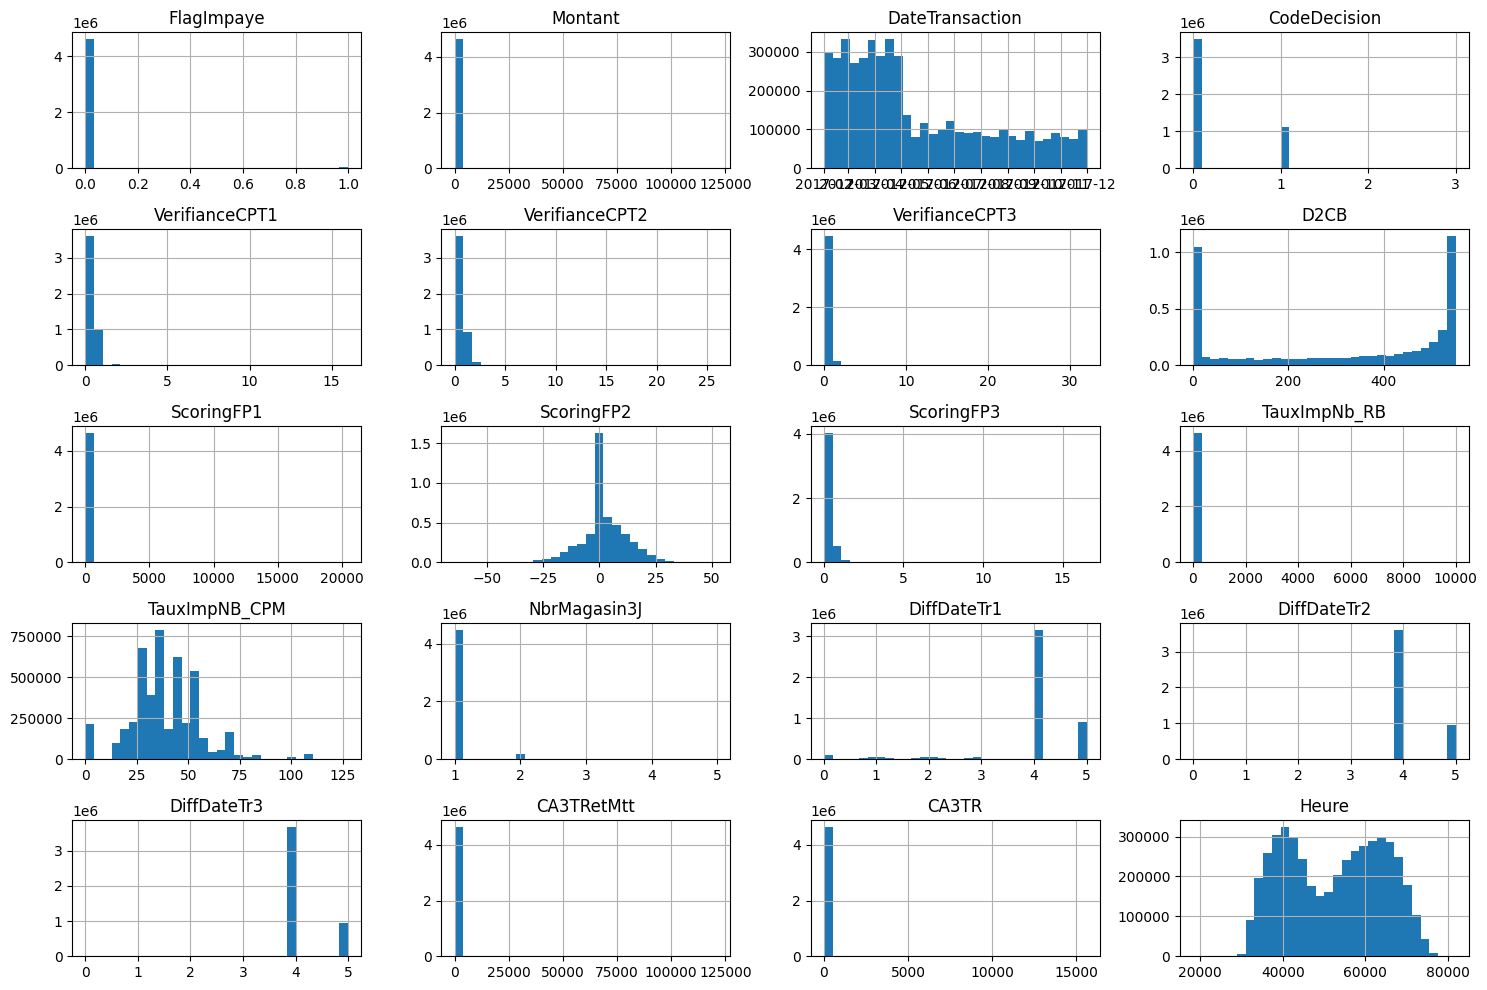

In [37]:
# Distribution of each variables
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()